In [12]:
#Import necessary library

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [18]:
# Importing dataset

#df = pd.read_csv('https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv')
dfWineData = pd.read_csv('winequality-red.csv')

dfWineData

#Observations based on method ->
# dataset contains the chemical data of the wine. and it have below data or columns.
# fixed acidity, volatile acidity, citric acid, residual sugar,chlorides, free sulfur dioxide, total sulfur dioxide, density,pH,sulphates, alcohol, quality
# so according to questions and primary analysis of the columns, target column is "Quality" (last col of below dataset)
# we need to build classification model to determine which chamicals will make wine quality  "Good" from 0 to 10 score


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
dfWineData.shape

#Observations based on method ->
# there is 1599 rows and 12 columns.
# 11 are independent columns and 1 target columns.

(1599, 12)

In [21]:
dfWineData.columns

#Observations based on method ->
#independent variable
#'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
#'free sulfur dioxide', 'total sulfur dioxide', 'density',
#'pH', 'sulphates', 'alcohol', 

#target column 'quality'

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
dfWineData.info()

#Observations based on method ->
#below info shows that, there are 12 columns 
# from 12 columns, 11 columns is float64. these are independent variable for problem statement.
# quality column is int64. this is target column.
# non-null count is also same for all columns means there is no null values exists in this dataset.
# and these counts for all columns is also same and i.e. 1599, which is also total index entries 1599

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
dfWineData.isnull().sum()

#Observations based on method ->
#Just to confirm, again there is no null values exists in dataset.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
# Get confirm that no whitespace exists in the columns and target columns.
for i in dfWineData.columns:
    print(dfWineData[i].value_counts())
    print("\n")

#Observations based on method ->
#there is no whitespace exists in this dataset. and also for target column.

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [29]:
# check statistical analysis of dataset

dfWineData.describe()

#Observations based on method ->
#statistical analysis of dataset as below
#1. the count is same for all the columns including target columns so there is no missing data or null data.
#2. the mean and mediam is near by for columns except 'free sulfur dioxide' and 'total sulfur dioxide'.
#3. the std, min and 25% values are seen to be ok for columns.
#4. the mean value of 'free sulfur dioxide' and 'total sulfur dioxide' columns is greater than median. 
# so it means data is skewed to right in these columns.
#5. there is huge difference in 75% and max in all columns except density, there may be outliers present in data.



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


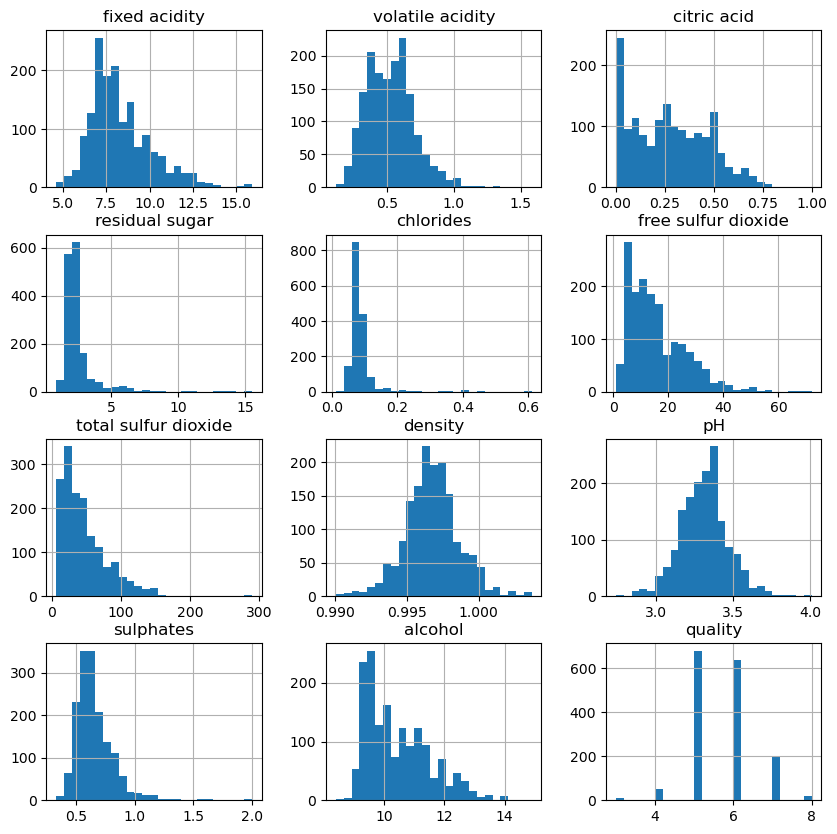

In [31]:
# Let us visualize this data in the columns of the dataset.

dfWineData.hist(bins=25,figsize=(10,10))
plt.show()

#Observations based on method ->
# The plot shows that data is normally distributed in columns. 
# we need to check correlation of data to each other. to understand in depth about this data.

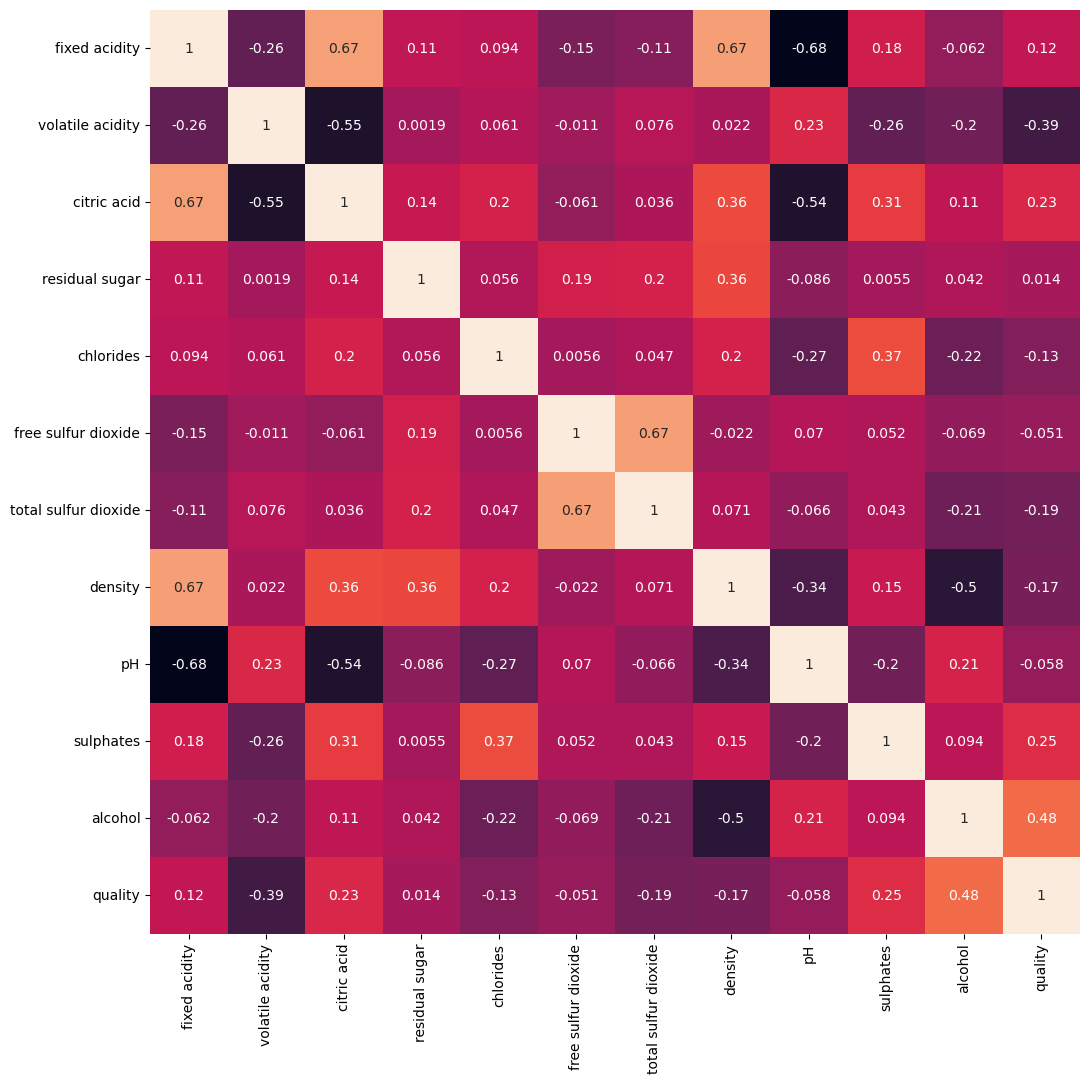

In [42]:
# Let us draw a heatmap to check corelation between each other columns.

plt.figure(figsize=(12, 12))
sns.heatmap(dfWineData.corr(), annot=True, cbar=False)
plt.show()

#Observations based on method ->
# Heatmap shows correlation matrix with independt and target data.
#1. there is very less -ve corelation with independent data and target data.
#2. the data volatile acidity,cholorides,free sulfur deioxide, total sulfur dioxide, density is -ve correlation with target data quality.
#3. there is high positive correlation with fixed acidity with cirtic acid and density which is 0.67. Also free sulfur deioxide with total sulfur dioxide 0.67.
#4. Alochol and target data quality have 0.48 correlation with each other, which is near to moderate relation.
#5. volatile acidity and quality have less -0.39 correlatio with each other.

In [43]:
#Let us find those columns that are fully correlated to each other. using  correlation number is high means 
#set the correlation number greater than 0.7, if any column has a correlation value above 0.7. then we can discard that column from dataset.
# with this it will impact on model accuracy. Let us try with below code to check the column. 

for i in range(len(dfWineData.corr().columns)):
    for j in range(i):
        if abs(dfWineData.corr().iloc[i,j]) >0.7: # there is no data on higher coorelation value.
            name = dfWineData.corr().columns[i]
            print(name)

#Observations based on method ->
# there is no data on higher coorelation value i.e. 0.7 
#so let us check other method.

In [45]:
# Let us check the correlation with target quality and other independet data.
dfWineData.corr()['quality'].sort_values(ascending=False)

#Observations based on method ->
# here is correlation data with target data Quality and other independet data.
# so, it looks like there is no need to actually drop as such any independet data.

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [47]:
# Let us set an arbitrary cutoff for your dependent variable (wine quality).
# at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'

dfWineData['winequality'] = [1 if x >= 7 else 0 for x in dfWineData['quality']]

dfWineData.head(10)
# new columns with winequality is set with 1 as good and 0 as not good.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winequality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [48]:
# let us see how much good and 'not good' quality wine in dataset.
dfWineData['winequality'].value_counts()

#so there are 1 i.e. good quality wine = 217
#and 0 i.e.'not good' quality wine = 1382.

0    1382
1     217
Name: winequality, dtype: int64

In [49]:
#Feature Selection - X & Y
# Separate feature variables and target variable
X = dfWineData.drop(['quality','winequality'], axis = 1)
Y = dfWineData['winequality']

In [51]:
# Standardize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [55]:
#check multicolinarity before building model using vif method.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF_Values"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["features"]=X.columns

vif

# Obeservation based on code.
# the vif values is higher 7.7 fixed acidity and density. but this could be feature required for wine quality so could not drop.
# all the vif values < 10 ?

,VIF_Values,features
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


In [56]:
#Check for balance the data / oversampling data

!pip install imblearn
from imblearn.over_sampling import SMOTE

sm= SMOTE()
x1,y1=sm.fit_resample(X,Y)



Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 235.6/235.6 kB 481.6 kB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.2 MB/s eta 0:00:00


In [57]:
Y.value_counts()

0    1382
1     217
Name: winequality, dtype: int64

In [58]:
y1.value_counts()

0    1382
1    1382
Name: winequality, dtype: int64

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(x1,y1)
score = classifiern.feature_importances_
print(score)

[0.06501389 0.1112474  0.09556001 0.05487974 0.05718541 0.05910845
 0.08448542 0.0732307  0.05670797 0.10772266 0.23485835]


In [60]:
# LET us build model.
# split the dataset train and test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1,test_size=0.3,random_state=7)

In [61]:
#decisiontreeclassifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8927710843373494


In [62]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8313253012048193
